# **Final Project Task 2 - Census EDA**

Requirements

- Analyze hours-per-week Target Distribution **1p**
    - Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation. **1p**

- Check for missing values and report the number and percentage of missing data for each column. **1p**

- Identify outliers in at least one numerical column using boxplots. **1p**

- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation. **1p**


- Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality. - Optional

- Generate bar plots for at least three categorical columns and discuss the frequency distributions. - Optional

- Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target. - Optional

- Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week. - Optional

- Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots. - Optional

- At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

- Others? - Optional


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4411,43,Private,304175,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K
10414,34,Private,36069,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,3908,0,46,United-States,<=50K
30732,26,Private,147638,Bachelors,13,Never-married,Adm-clerical,Other-relative,Asian-Pac-Islander,Female,0,0,40,Hong,<=50K
27700,44,Private,62258,11th,7,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
3707,41,Private,113555,Some-college,10,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,7298,0,50,United-States,>50K
15072,62,Private,113440,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,35,United-States,<=50K
21483,28,?,127833,HS-grad,9,Never-married,?,Unmarried,Black,Female,0,0,40,United-States,<=50K
29083,53,Private,187356,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,66,United-States,<=50K
30377,52,Private,114228,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Male,3325,0,40,United-States,<=50K
24504,60,State-gov,352156,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K


In [23]:
# Replacing ? with nan 
data.replace({'?': np.nan}, inplace=True)

# Analyzing hours-per-week target distribution

In [24]:
# Creating histogram
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

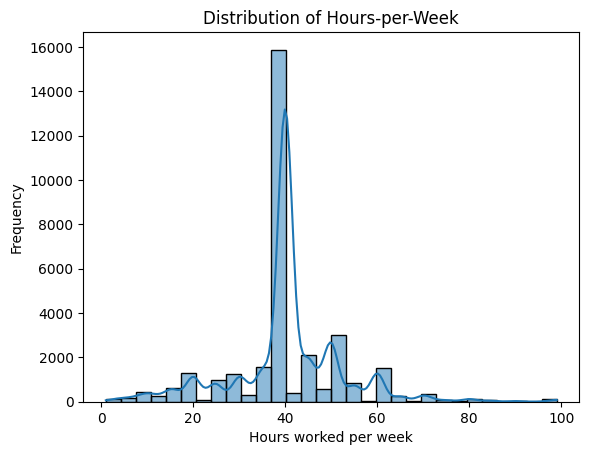

In [25]:

sns.histplot(data['hours-per-week'], kde=True, bins=30)
plt.title('Distribution of Hours-per-Week')
plt.xlabel('Hours worked per week')
plt.ylabel('Frequency')
plt.show()

In [26]:
# Boxplot
plt.figure(figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

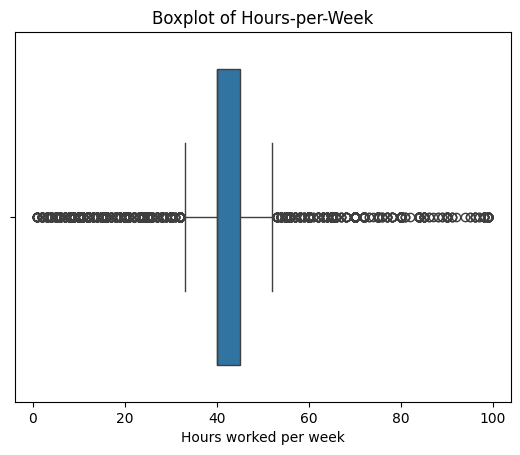

In [27]:
sns.boxplot(x=data['hours-per-week'])
plt.title('Boxplot of Hours-per-Week')
plt.xlabel('Hours worked per week')
plt.show()

In [28]:
# Creating metrics
skew = data['hours-per-week'].skew()
kurt = data['hours-per-week'].kurtosis()
mean_val = data['hours-per-week'].mean()
median_val = data['hours-per-week'].median()

In [29]:
print(f"Mean:     {mean_val:.2f}")
print(f"Median:   {median_val:.2f}")
print(f"Skewness: {skew:.4f}")
print(f"Kurtosis: {kurt:.4f}")

Mean:     40.44
Median:   40.00
Skewness: 0.2276
Kurtosis: 2.9167


#### Skewness > 0 = asimetrie pozitiva la dreapta. Coada graficului fiind mai lunga in partea dreapta, ceea ce inseamna ca mai multi oameni lucreaza spre 99 ore / saptamana.
#### Boxplot, liniile exterioare delimiteaza intervalul normal de valori. Orice punct aflat in afara acestor linii este considerat un outlier natural/
#### Kurtosis, valoare care se apropie de 3, confirma ca valorile extreme sunt destul de frecvente in acest set de date
#### Histograma -> majoritatea oamenilor lucreaza 40 de ore / saptamana

# Checking for missing values

In [30]:
missing_values_count = data.isnull().sum()
missing_per = (data.isnull().sum() / len(data)) * 100
missing_report = pd.DataFrame({
    'Missing Count': missing_values_count,
    'Missing Percentage (%)': missing_per.map('{:.2f}'.format)
})

In [31]:
missing_report_sorted = missing_report.sort_values(by='Missing Count', ascending=False)

In [32]:
print(missing_report_sorted)

                Missing Count Missing Percentage (%)
occupation               1843                   5.66
workclass                1836                   5.64
native-country            583                   1.79
fnlwgt                      0                   0.00
education                   0                   0.00
education-num               0                   0.00
age                         0                   0.00
marital-status              0                   0.00
relationship                0                   0.00
sex                         0                   0.00
race                        0                   0.00
capital-gain                0                   0.00
capital-loss                0                   0.00
hours-per-week              0                   0.00
income                      0                   0.00


# Missing values in at least one numerical column

Text(0.5, 0, 'Hours per Week')

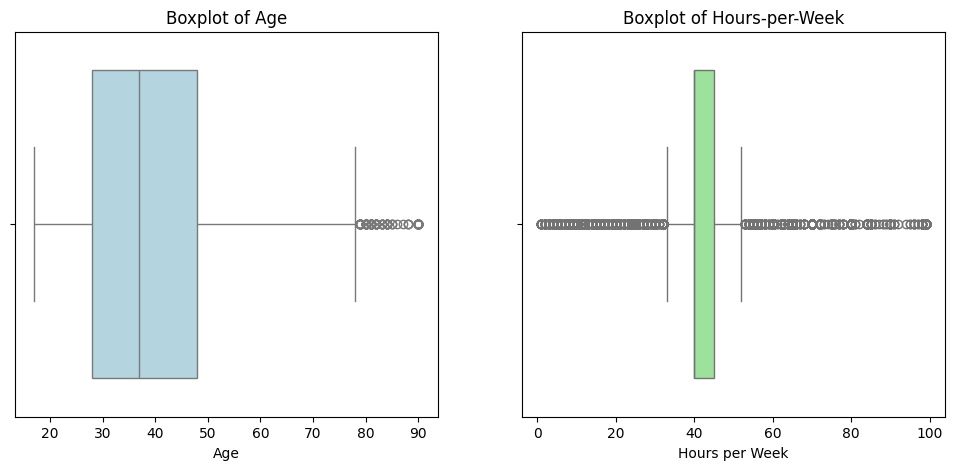

In [47]:
# Creating boxplot for age and hours-per-week column
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x=data['age'], color='lightblue', ax=axes[0])
axes[0].set_title('Boxplot of Age')
axes[0].set_xlabel('Age')

sns.boxplot(x=data['hours-per-week'], color='lightgreen', ax=axes[1])
axes[1].set_title('Boxplot of Hours-per-Week')
axes[1].set_xlabel('Hours per Week')

#### Boxploturile ne arata ca ambele coloane numerice (age, hours-per-week) au multi outlieri. 
#### Pentru coloana age, distributia este asimetrica spre dreapta. Punctele din partea dreapta reprezinta persoanele care au varsta mult mai mare fata de majoritatea persoanelor.
#### Pentru coloana hours-per-week, datele sunt concentrate in mijloc, la 40 de ore, ceea ce reprezinta ca majoritatea oamenilor lucreaza 40 ore / saptamana, iar in privinta outlierilor putem trage concluzia ca: persoanele din dreapta stanga lucreaza undeva la 30 ore / saptamana si s-ar putea sa fie part-time, iar persoanele in dreapta ajung sa lucreze 50 ore plus / saptamana, ceea ce poate insemna ca lucreaza over-time.

# Analiza EDA

## Setul de date contine valori lipsa in 3 coloane: occupation (5.66%), workclass (5.64%), native-country (1.79%). Aici ar merge sa fac imputarea folosind varianta modul (cum am facut si in tema 1).
##### 7 persoane care sunt prezente in coloana 'never-worked' apar si in coloana 'hours-per-week' avand valori > 0, ceea ce nu are sens, si astea ar trebui eliminate (cum am facut in tema 1).
##### Avem o persoana care apare ca fiind sot, dar in coloana 'sex' apare ca are gen feminin.
##### Apar multe duplicate (aproximativ 24) ceea ce trebuie eliminate (cum am facut in tema 1).

## Analiza distributiei la coloana hours-per-week:
##### Media de 40 si mediana de 40.44 sunt aproape identice si indica o puternica tendinta centrala.
##### Distributia kurtosis de 2.9167 inseamna un varf foarte inalt la variabila de 40 de ore.
##### Skewness de 0.22 indica o asimetrie pozitiva, o usoara tendinta catre orele suplimentare (partea dreapta).

## Recomandari:
##### Coloana 'fnlwgt' arata o corelatie 0 cu hours-per-week, deci am putea sa-l eliminam.
##### Ar trebui curatate datele sau cel putin curatate problemele descrise mai sus (cele 7 pers. din coloana 'never-worked', pers care apare ca fiind sot si gen feminin, duplicatele).


# Plot histograms for at least three numerical columns

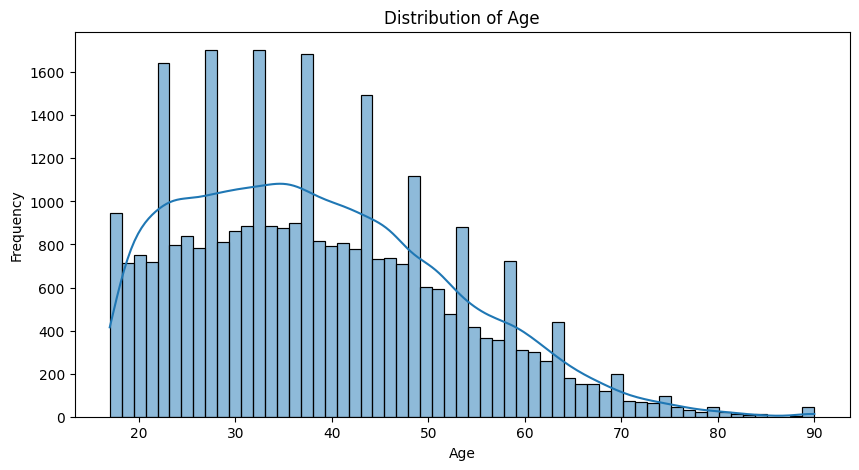

Skewness Age: 0.5587


In [66]:
# 1. Histogram for age
plt.figure(figsize=(10, 5))
sns.histplot(data['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
print(f'Skewness Age: {data['age'].skew():.4f}')

##### Distributie pozitiva spre dreapta, asta indica faptul ca forta de munca este predominant tanara sau de varsta mijlocie, existand mai putini angajati de la varstele de 60 +.

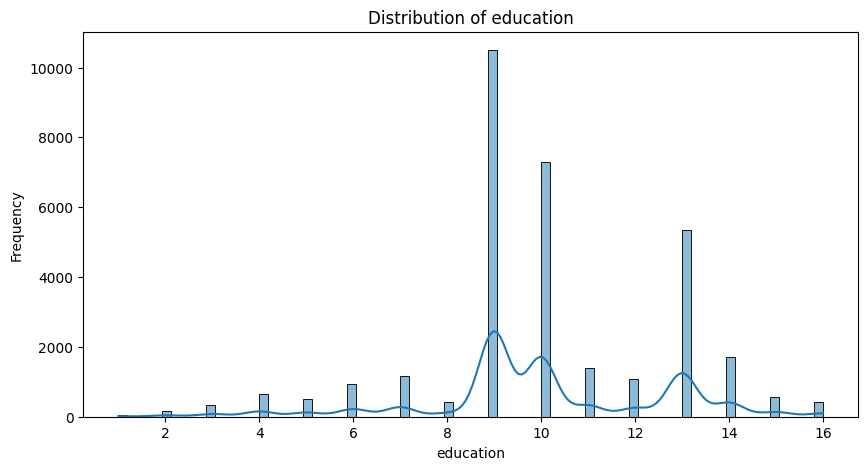

Skewness education: -0.3117


In [67]:
# 2. Histogram for education-num
plt.figure(figsize=(10, 5))
sns.histplot(data['education-num'], kde=True)
plt.title('Distribution of education')
plt.xlabel('education')
plt.ylabel('Frequency')
plt.show()
print(f'Skewness education: {data['education-num'].skew():.4f}')

##### Distributie multimodala, cu asimetrie negativa spre stanga. Histograma ne arata ca majoritatea populatiei se afla in partea superioara a educatiei, iar numarul celor cu educatie scazuta este semnificativ mai mica.

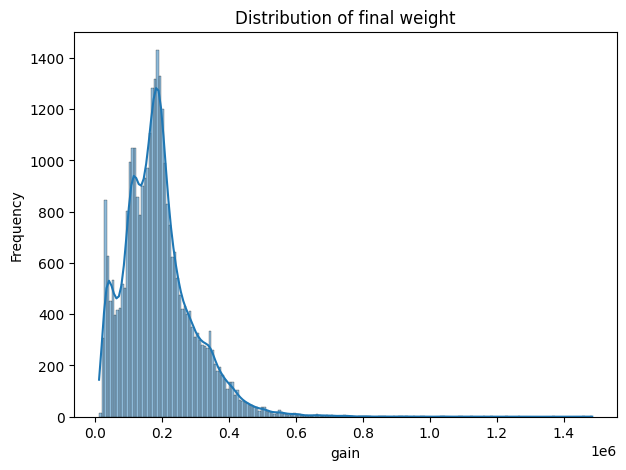

Skewness final weight: 1.4470


In [72]:
# 3. Histogram for capital-gain
plt.figure(figsize=(7, 5))
sns.histplot(data['fnlwgt'], kde=True)
plt.title('Distribution of final weight')
plt.xlabel('gain')
plt.ylabel('Frequency')
plt.show()
print(f'Skewness final weight: {data['fnlwgt'].skew():.4f}')

##### Asimetrie pozitiva.

# Generate bar plots for at least three categorical columns

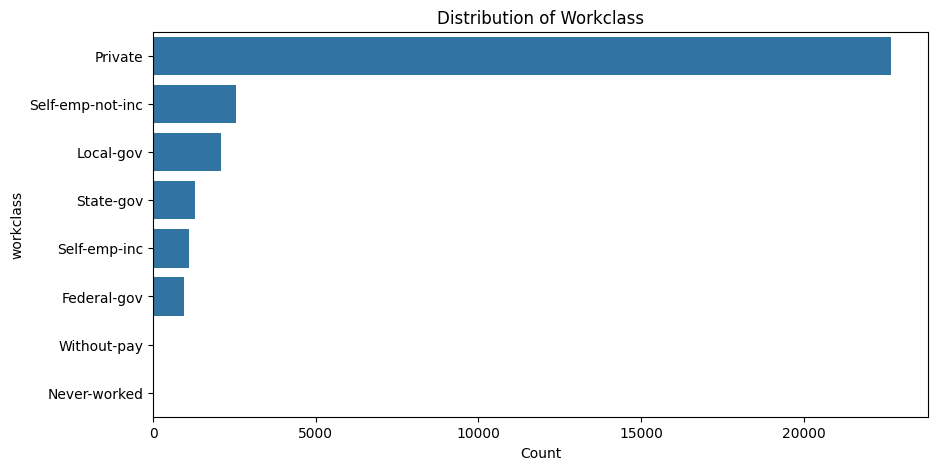

In [88]:
# 1. Workclass bar plot
plt.figure(figsize=(10, 5))

sns.countplot(y=data['workclass'], order=data['workclass'].value_counts().index)
plt.title('Distribution of Workclass')
plt.xlabel('Count')
plt.show()

##### Sectorul privat predomina.

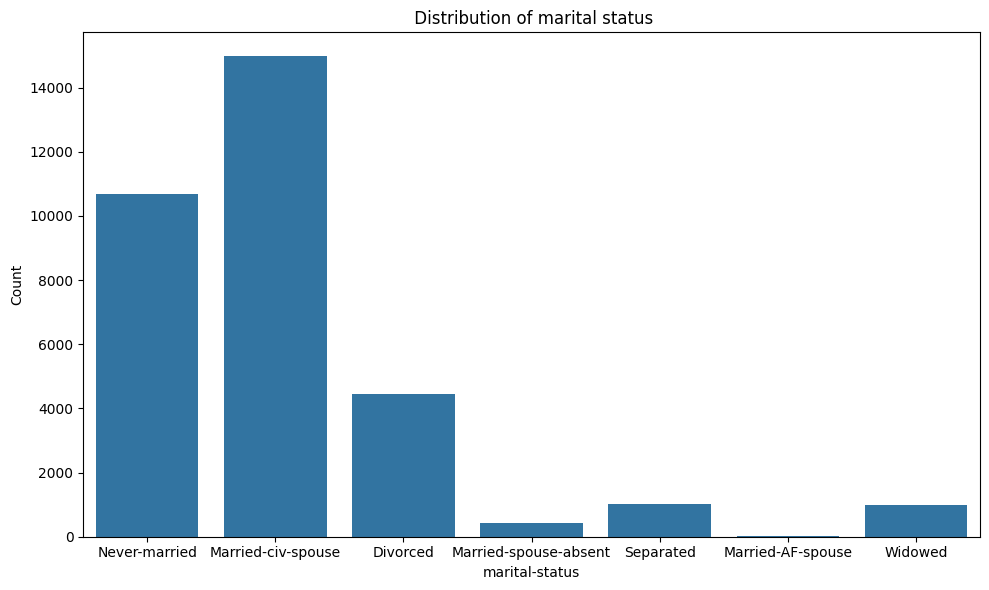

In [100]:
# 2. Boxplot for marital-status
plt.figure(figsize=(10, 6))

sns.countplot(data=data, x='marital-status')
plt.title(' Distribution of marital status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

##### Cele 2 grupe care predomina sunt 'married-civ-spouse' si 'never-married'.

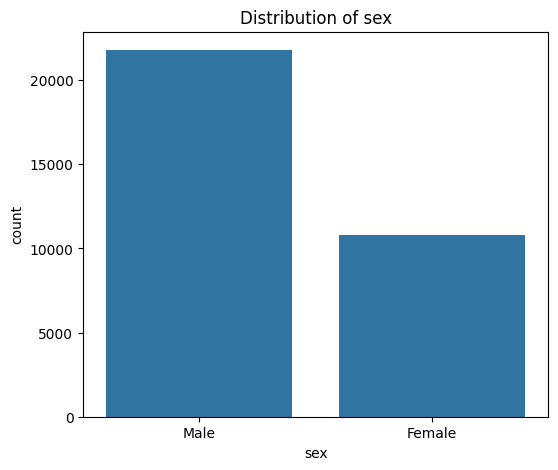

In [101]:
# 3. Boxplot for sex
plt.figure(figsize=(6, 5))
sns.countplot(x=data['sex'])
plt.title('Distribution of sex')
plt.show()

##### Genul masculin predomina in acest dataset.

# Correlation matrix

Text(0.5, 1.0, 'Correlation Heatmap')

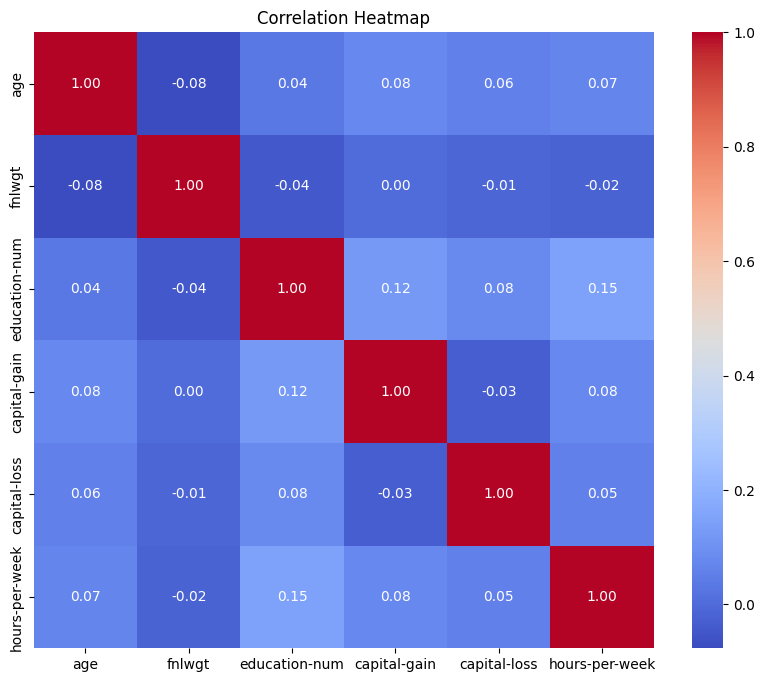

In [104]:
# Selectam coloanele numerice
col_numeric = data.select_dtypes(include=[np.number])
cor_matrix = col_numeric.corr()

# Creare heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot = True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

In [ ]:
# Printarea corelatiei
print(cor_matrix['hours-per-week'].sort_values(ascending=False))

hours-per-week    1.000000
education-num     0.148123
capital-gain      0.078409
age               0.068756
capital-loss      0.054256
fnlwgt           -0.018768
Name: hours-per-week, dtype: float64


### Analiza cu coloana target (hours-per-week)
##### capital-loss -> cea mai slaba corelatie.
##### age -> corelatie foarte slaba, nu exista nici o corelatie intre varsta oamenilor si orele de lucru pe saptamana.
##### capital-gain -> corelatie putin pozitiva, persoanele care lucreaza mai mult tind sa aiba putin mai mare capital gain.
##### education_num -> corelatie pozitiva, persoanele cu educatie mai ridicata tind sa lucreze mai mult.

# Scatter plot

Text(0.5, 1.0, 'Relatia dintre education-num si hours-per-week')

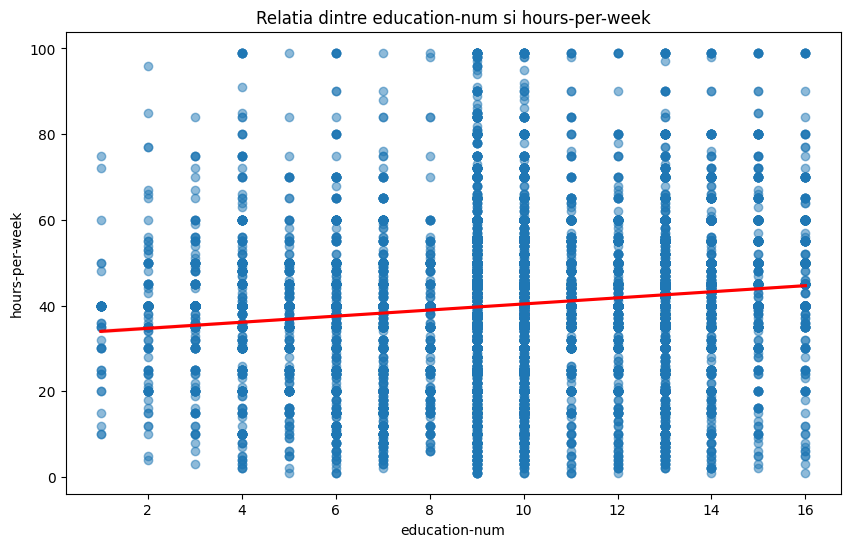

In [ ]:
x_var = 'education-num'
y_var = 'hours-per-week'
plt.figure(figsize=(10, 6))
# Regplot pentru a adauga automat linia de regresie, ceea ce ajuta la vizualizarea relatiei dintre cele doua variabile.
sns.regplot(data=data, x=x_var, y=y_var, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title(f'Relatia dintre {x_var} si {y_var}')

#### Scatterplotul valideaza ipoteza ca investitia in educatie coreleaza cu o implicare mai mare in piata muncii. Desi majoritatea oamenilor lucreaza 40 de ore, sansa de a lucra ore suplimentare creste odata cu educatia, in timp ce riscul de a lucra part time scade odata cu educatia.